In [1]:
from Common_functions import *

In [2]:
from Planetary_fits import *
                            

In [3]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
import re
from tqdm import tqdm
import scipy.stats as st
from os.path import expanduser
import cmath
import scipy.optimize as op
import time
import gzip
from scipy.interpolate import interp1d
import pandas as pd
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import (mark_inset,inset_axes,InsetPosition) 
import traceback
from lmfit import minimize, Parameters, Parameter, report_fit
import math
from sympy.solvers import solve
from sympy import Symbol
import sympy


%matplotlib inline
home = os.path.expanduser("~")

In [4]:
def med_med (fitted, true):
    temp = fitted - true
    return (np.median(np.abs(temp-np.median(temp))))

In [5]:
# Set up te directory where all microlensing data challenge lightcurves are

temp_dir = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/alldclc/'
direc = os.listdir(temp_dir)

In [82]:
info[['s','q']][info.name == 'mag.omcassan_0_22_526.det.lc.W149']

,s,q
19,0.623442,0.000127


# Fitting the PSPL+Gaussian to one of the data challenge light curves

In [83]:
# Reading in one single lightcurve from the small sample of data challenge light curves

f = '/mag.omcassan_0_11_1456.det.lc.W149' #non-binary

t,m,e = np.loadtxt(temp_dir+f,unpack=True)

lightcurve = np.zeros((len(t),4))
lightcurve[:,0] = t
lightcurve[:,1] = m
lightcurve[:,2] = e
peak = t[np.argmin(m)]

(baseline, event, it0) = localize_event(lightcurve, peak,50)

In [84]:
# info[['s','q']][info.name == f.split('/')[1]]

In [85]:
df, baseline, event, it0, dt = prepare(t,m,e)

init = initial_guess_finder (df['t'], df['A'])

print init

PSPL_final_params, PSPL_chisqr = PSPL_fitter_scipy (df['t'], df['A'], df['A_err'], init)

print PSPL_final_params[0]-2458234

df['A_residual'], peaks = PSPL_residual (df['t'], df['A'], PSPL_final_params)

print len(peaks)

Gaussian_final_params = Gaussian_fitter_lmfit (df['t'], df['A'], PSPL_final_params)

final_params, final_chisqr = PSPL_Gaussian_fitter_lmfit (df['t'], df['A'], df['A_err'], PSPL_final_params, Gaussian_final_params)
print final_params[0]-2458234

(2460020.17335, 38.6487110001035, 0.0986070427368962)
1786.1886839619838
2
1786.1886839619838


(1785.1733499998227, 1787.1733499998227)

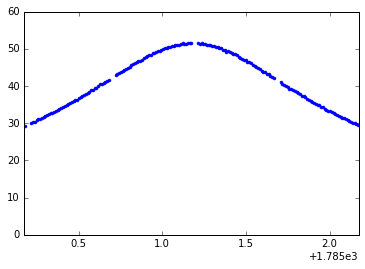

In [90]:
dtt = 1

plt.plot(df['t']-2458234, df['A'],'b.')
plt.axvline(init[0])
plt.xlim(init[0]-2458234-dtt, init[0]-2458234+dtt)

In [25]:
PSPL_final_params

[2537734.135255792, 3.386848465503652, 0.7389559704852684, 0.4818480730056763]

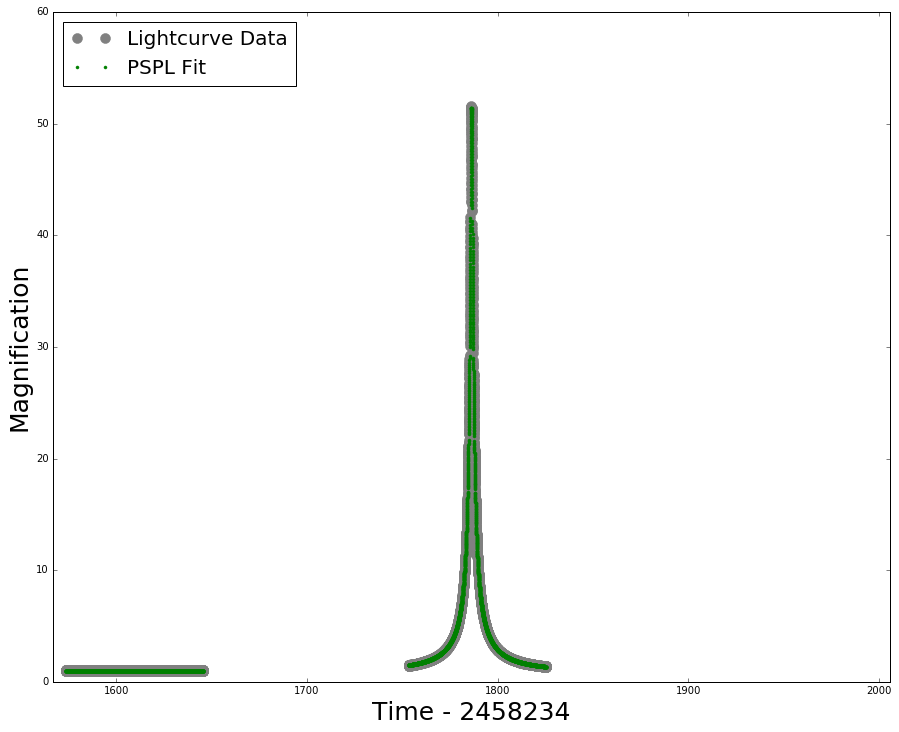

In [88]:
PSPL_plotter (df['t'], df['A'], PSPL_final_params)

(1766.8752720002085, 1806.8752720002085)

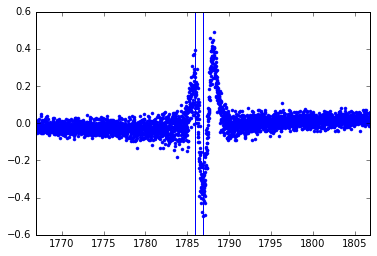

In [89]:
dtt =20
t_ = np.asarray(df['t'].values)
plt.plot(df['t']-2458234, df['A_residual'], 'b.')
plt.axvline(peaks[0]-2458234)
plt.axvline(peaks[1]-2458234)


plt.xlim(peaks[0]-2458234-dtt, peaks[0]-2458234+dtt)
# plt.xlim(480,520)

In [92]:
u = np.sqrt(final_params[2]**2 + ((final_params[0]-peaks[0])/final_params[1])**2)

s0 = Symbol('s0')
s = (solve(s0-(1/s0)-u, s0))[1]

if final_params[6] > 0:
    s_final = s
else:
    s_final = 1./s

q_final = (final_params[5]/final_params[1])**2

In [93]:
if len(peaks) == 1:
    s, q = calculate_s_q_single (final_params[0], final_params[1], final_params[2],\
                                           peaks, final_params[5],final_params[6])
if len(peaks) == 2:
    s, q = calculate_s_q_double (PSPL_final_params[0], PSPL_final_params[1], PSPL_final_params[2], peaks)

NameError: name 'calculate_s_q_double' is not defined

In [94]:
print s, q

1.01118400795064

NameError: name 'q' is not defined

In [26]:
info[['s','q']][info.name == 'mag.omcassan_0_100_2559.det.lc.W149']

,s,q
1,2.48411,0.000792


(1766.8702582507394, 1806.8702582507394)

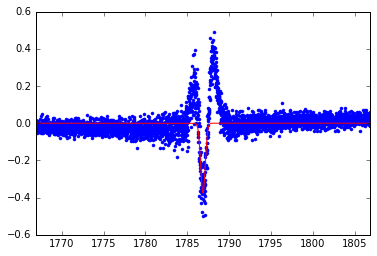

In [91]:
dtt =20
t_ = np.asarray(df['t'].values)
plt.plot(df['t']-2458234, df['A_residual'], 'b.')
plt.plot(df['t']-2458234, Gaussian(Gaussian_final_params[0], Gaussian_final_params[1],Gaussian_final_params[2], df['t']), 'r-')
# plt.plot(df['t']-2458234, Gaussian(t_[f_res.argmin()], 1.5,-0.2, df['t']), 'g-')
# plt.axvline(temp[0][np.argmin(temp[1])]['tp']-2458234)
plt.xlim(Gaussian_final_params[0]-2458234-dtt, Gaussian_final_params[0]-2458234+dtt)

# plt.xlim(160,200)

48818.571810340145 48818.62099158013


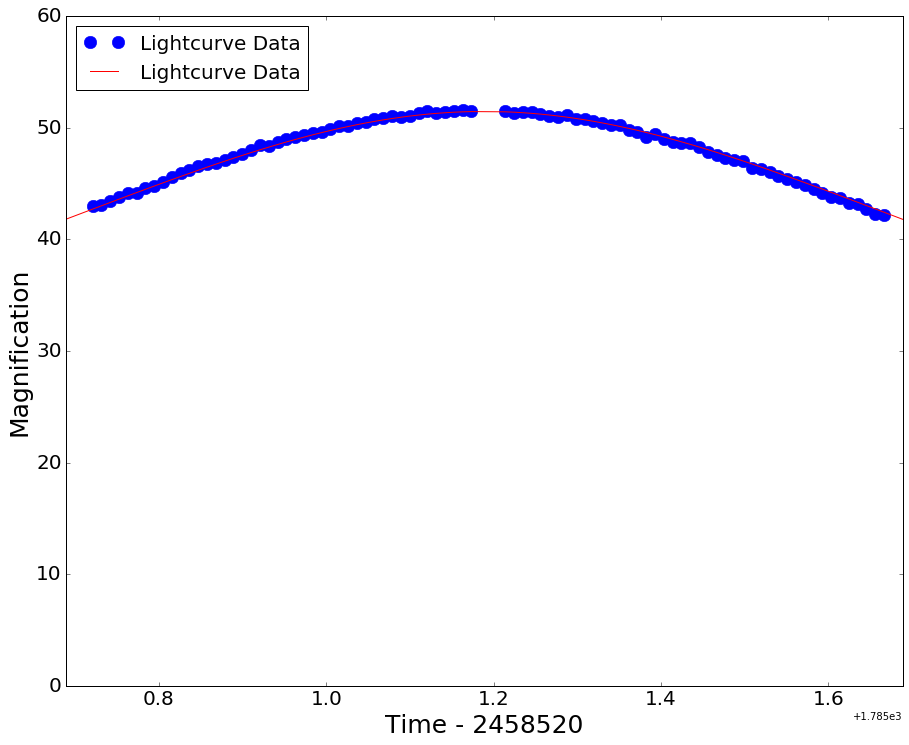

In [96]:
dtt =0.5
plt.plot(df['t']-2458234,df['A'],'b.', markersize=25, label='Lightcurve Data')
plt.plot(df['t']-2458234,PSPL_Gaussian(final_params[0], final_params[1], final_params[2],
                                       final_params[3], final_params[4], final_params[5],
                                       final_params[6], df['t']),'r-', label='Lightcurve Data')

print PSPL_chisqr, final_chisqr

plt.ylabel('Magnification', size=25)
plt.xlabel('Time - 2458520', size=25)
plt.legend(loc=2,fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(final_params[0]-2458234-dtt, final_params[0]-2458234+dtt)


fig = plt.gcf()
fig.set_size_inches(15.0,12.0)
# plt.savefig('Chebyshevfit_success.png')

# Fitting the PSPL+Gaussian to the small sample of data challenge light curves

In [4]:
# Set up te directory where all microlensing data challenge lightcurves are

temp_dir = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/lc/'
direc_selected = os.listdir(temp_dir)

In [5]:
# Trying it on all light curves of the large sample of data challenge light curves

direc_selected.sort()
result_n = {'name':[], 't':[], 'A':[], 'Aerr':[], 'params_1':[], 'deviations': [], 'n_deviations': [], 'params_2':[],'chisqr1_tot':[], 'chisqr2_tot':[]}
for f in tqdm(direc_selected):
    
    if f.endswith('.txt') and f.split('_')[2].startswith('W'):
        
        try:
            t,m,e = np.loadtxt(temp_dir+str(f),unpack=True)

            df, baseline, event, it0, dt = prepare(t,m,e)

            init = initial_guess_finder (df['t'], df['A'])

            PSPL_final_params, PSPL_chisqr = PSPL_fitter_scipy (df['t'], df['A'], df['A_err'], init)
            
            df['A_residual'], peaks = PSPL_residual (df['t'], df['A'], PSPL_final_params)
            
            Gaussian_final_params = Gaussian_fitter_lmfit (df['t'], df['A'], PSPL_final_params)
            
            final_params, final_chisqr = PSPL_Gaussian_fitter_lmfit (df['t'], df['A'], df['A_err'], PSPL_final_params, Gaussian_final_params)
            
            result_n['name'].append(f)
            result_n['t'].append(df['t'])
            result_n['A'].append(df['A'])
            result_n['Aerr'].append(df['A_err'])
            result_n['params_1'].append(PSPL_final_params)
            result_n['deviations'].append(peaks)
            result_n['n_deviations'].append(len(peaks))
            result_n['params_2'].append(final_params)
            result_n['chisqr1_tot'].append(PSPL_chisqr)
            result_n['chisqr2_tot'].append(final_chisqr)
        
        except (RuntimeError, TypeError, NameError, ValueError):
            
            traceback.print_exc()
            pass
        


print 'done'

  0%|          | 0/590 [00:00<?, ?it/s]/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)
  2%|▏         | 13/590 [00:40<29:40,  3.09s/it]Traceback (most

KeyboardInterrupt: 

ulwdc1_230_W149.txt
45054.60484001483 40770.064252107935
3.0


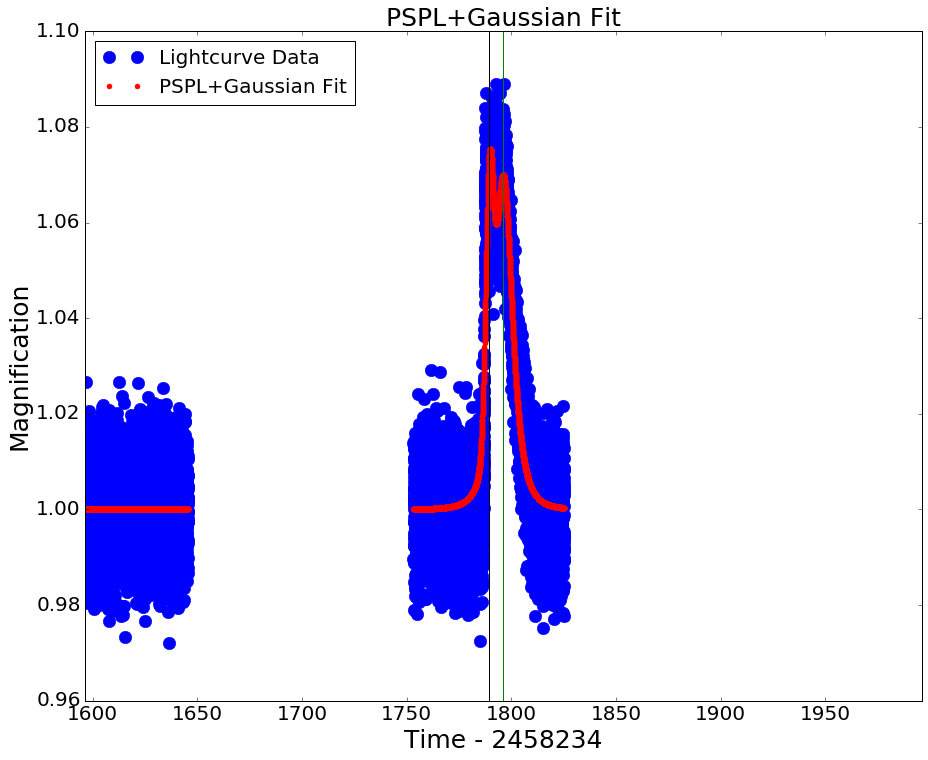

In [374]:
# Testing individual results 

i = 227
dtt =200
print result_n['name'][i]

plt.plot(result_n['t'][i]-2458234,result_n['A'][i],'b.', markersize=25, label='Lightcurve Data')
plt.plot(result_n['t'][i]-2458234,PSPL_Gaussian(result_n['params_2'][i][0],result_n['params_2'][i][1],result_n['params_2'][i][2],
                                       result_n['params_2'][i][3],result_n['params_2'][i][4], result_n['params_2'][i][5],
                                       result_n['params_2'][i][6], df['t']),
        'r.', markersize=10, label='PSPL+Gaussian Fit')

plt.ylabel('Magnification', size=25)
plt.xlabel('Time - 2458234', size=25)
plt.title('PSPL+Gaussian Fit',size=25)

plt.xlim(result_n['params_2'][i][3]-2458234-dtt,result_n['params_2'][i][3]-2458234+dtt)
#plt.xlim(100,300)
plt.legend(loc=2,fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axvline(result_n['params_2'][i][0]-2458234, color='k')
plt.axvline(result_n['params_2'][i][3]-2458234, color = 'g')


print result_n['chisqr1_tot'][i], result_n['chisqr2_tot'][i]
print info.type[5]

fig = plt.gcf()
fig.set_size_inches(15.0,12.0)

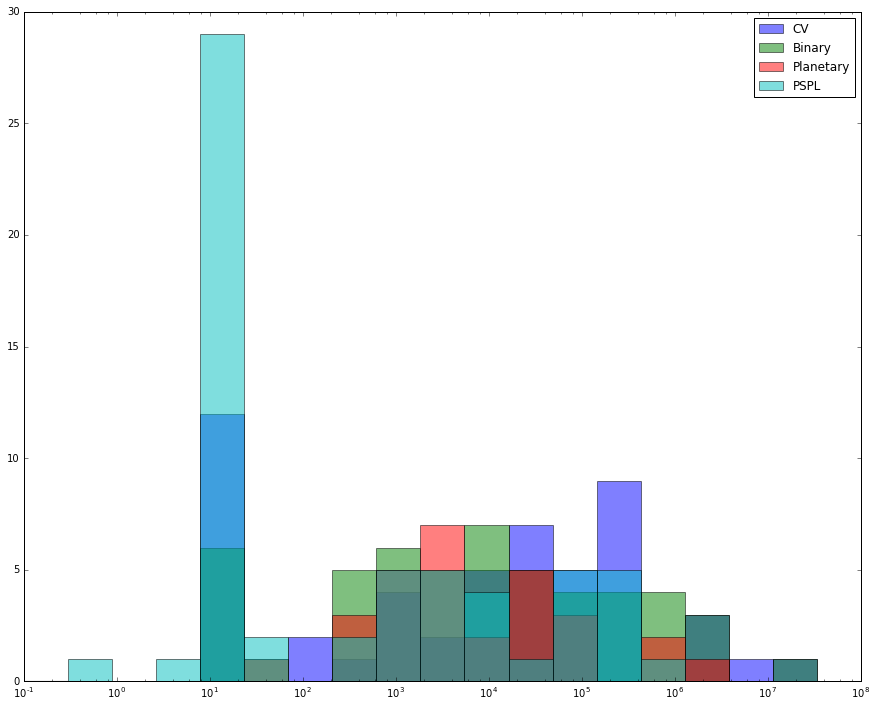

In [302]:
plt.hist(info.sub_chi2_par[info['type']==0], bins = np.logspace(-1,8,20), alpha=0.5, label = 'CV')
plt.hist(info.sub_chi2_par[info['type']==1], bins = np.logspace(-1,8,20), alpha=0.5, label = 'Binary')
plt.hist(info.sub_chi2_par[info['type']==2], bins = np.logspace(-1,8,20), alpha=0.5, label = 'Planetary')
plt.hist(info.sub_chi2_par[info['type']==3], bins = np.logspace(-1,8,20), alpha=0.5, label = 'PSPL')

plt.legend()


plt.xscale('log')

fig = plt.gcf()
fig.set_size_inches(15.0,12.0)

In [342]:
# Read in true information of the data challenge light curves

info = pd.read_csv('data_info.csv')
info = info.drop(info.index[0])

In [343]:
# Saving the number of light curves containing specific classes

type0 = float(len(info[info['type']==0])) #dcc
type1 = float(len(info[info['type']==1])) #Binary-lens
type2 = float(len(info[info['type']==2])) # Planetary
type3 = float(len(info[info['type']==3])) # PSPL/FFP

In [666]:
# Adding the test results to the information Data Frame


info['chisqr1_tot'] = np.zeros(len(info))
info['chisqr2_tot'] = np.zeros(len(info))


info['tE_exp'] = np.zeros(len(info))
info['t0_exp'] = np.zeros(len(info))
info['u0_exp'] = np.zeros(len(info))
info['tp_exp'] = np.zeros(len(info))
info['tEp_exp'] = np.zeros(len(info))
info['am_exp'] = np.zeros(len(info))
info['fs_exp'] = np.zeros(len(info))


for i in range(len(result_n['A'])):
    
    
    
#     info.set_value(j+1,'tE_exp', result_n['params_2'][j][4])
#     info.set_value(j+1,'t0_exp', result_n['params_2'][j][3]-2458234)
#     info.set_value(j+1, 'u0_exp', result_n['params_2'][j][5])
#     info.set_value (j+1, 'tp_exp',  result_n['params_2'][j][0]-2458234)
#     info.set_value(j+1, 'tEp_exp', result_n['params_2'][j][1])
#     info.set_value(j+1, 'am_exp', result_n['params_2'][j][2])
#     info.set_value(j+1, 'fs_exp', result_n['params_2'][j][6])
#     info.set_value(j+1, 'chisqr1_tot', result_n['chisqr1_tot'][j])
#     info.set_value(j+1, 'chisqr2_tot', result_n['chisqr2_tot'][j])
    
    info.loc[info.name == result_n['name'][i],'tE_exp'] = result_n['params_2'][i][4]
    info.loc[info.name == result_n['name'][i],'t0_exp'] = result_n['params_2'][i][3]-2458234
    info.loc[info.name == result_n['name'][i],'u0_exp'] = result_n['params_2'][i][5]
    info.loc[info.name == result_n['name'][i],'tp_exp'] = result_n['params_2'][i][0]-2458234
    info.loc[info.name == result_n['name'][i], 'tEp_exp'] = result_n['params_2'][i][1]
    info.loc[info.name == result_n['name'][i], 'am_exp'] = result_n['params_2'][i][2]
    info.loc[info.name == result_n['name'][i], 'fs_exp'] = result_n['params_2'][i][6]
#     info.loc[info.name == result['name'][i], 'fb_PSPL'] = result['fb_PSPL'][i].value
    info.loc[info.name == result_n['name'][i], 'chisqr1_tot'] = result_n['chisqr1_tot'][i]
    info.loc[info.name == result_n['name'][i], 'chisqr2_tot'] = result_n['chisqr2_tot'][i]

    

In [667]:
# Calculating the difference in chi square of the two fits

info['sub_chi2_par'] = np.abs(info['chisqr1_tot']-info['chisqr2_tot'])#/ len(df['t'])

In [668]:
info2 = info.copy(deep=True)

In [308]:
info = info [(info.t0_exp-info.t0)<10]

In [ ]:
# Fitting chi suare 2 versus 1

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
x = 's'
y = 's_exp'
c_x = 1#1./(38568-6)
c_y = 1 #1./(38568-6)

axs[0,0].plot((c_x*info[x][(info['type']==0)]),(c_y*info[y][(info['type']==0)]), '.',markersize=18, label= 'CV',color='r')
axs[0,0].grid()
axs[0,0].legend()
axs[0,1].plot((c_x*info[x][(info['type']==1)]),(c_y*info[y][(info['type']==1)]), '.',markersize=18, label= 'Binary', color='g')
axs[0,1].grid()
axs[0,1].legend()
axs[1,0].plot((c_x*info[x][(info['type']==2)]),(c_y*info[y][(info['type']==2)]), '.',markersize=18, label= 'Planetary',  color = 'orange')
axs[1,0].plot((c_x*info[x][(info['type']==2)]),(c_y*info[x][(info['type']==2)]), 'k-',markersize=18)


axs[1,0].grid()
axs[1,0].legend()
axs[1,1].plot((c_x*info[x][(info['type']==3)]),(c_y*info[y][(info['type']==3)]), '.',markersize=18, label= 'PSPL/FFP', color='blue')
axs[1,1].grid()
axs[1,1].legend()


axs[0, 1].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
axs[0, 1].tick_params(axis='y',which='both', bottom='right', top='left',labelleft='off',length=0)

axs[0, 0].tick_params(axis='y',which='both', labelsize=12)
axs[1, 0].tick_params(axis='both',which='both', labelsize=12)
axs[1, 1].tick_params(axis='x',which='both', labelsize=12)

plt.yscale('log')
plt.xscale('log')



axs[0, 0].tick_params(axis='x',which='both', bottom='off', top='off',labelbottom='off')
axs[1, 1].tick_params(axis='y',which='both', bottom='right', top='left',labelleft='off', length=0)

xlim = (8e-1,1e4)
ylim = (8e-1,1e4)

# axs[0,0].set_ylim(ylim)
# axs[0,0].set_xlim(xlim)
# axs[0,1].set_ylim(ylim)
# axs[0,1].set_xlim(xlim)
# axs[1,0].set_ylim(ylim)
# axs[1,0].set_xlim(xlim)
# axs[1,1].set_ylim(ylim)
# axs[1,1].set_xlim(xlim)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.05, hspace=0.08) 

fig.text(0.5, 0.07, x, ha='center',size=30)
fig.text(0.07, 0.5, y, va='center', rotation='vertical',size=30)

fig = plt.gcf()
fig.set_size_inches(20.0,15.0)
#fig.savefig('a4-a2.png')

In [671]:
# Adding q values to the information table

info['q_exp'] = (info['tEp_exp']/(2*info['tE_exp']))**2 
info['q_exp_log'] = np.log10(info['q_exp'])
info['q_log'] = np.log10(info['q'])

info['tEp'] = np.sqrt(info.q + (info.rho)**2) * info.tE

In [672]:
# Adding s values to the information table

info['xc_exp'] = np.sqrt(info['u0_exp']**2 + ((info['t0_exp']-info['tp_exp'])/(2*info['tE_exp']))**2)
s1 = ( u + np.sqrt(4+ u**2))/2
s2 = ( u - np.sqrt(4+ u**2))/2

info['s_exp'] = np.zeros(len(info['type']))
info['s_exp'][info.am_exp>0] = s1[info.am_exp>0]
info['s_exp'][info.am_exp<0] = s2[info.am_exp<0]



# for i in ((info['name'])):
    
#     if info['am_exp'][info.name] > 0:
        
#         info.set_value(i+1,'s_exp', s1[i+1])
#     else:
#         info.set_value(i+1,'s_exp', s2[i+1])

info['s_exp_log'] = np.log10(info['s_exp'])
info['s_log'] = np.log10(info['s'])

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [673]:
# Adding Xc values to the information table

info['xc2']= ((1.0/info['s'])-info['s'])**2
info['xc2_exp']= ((1.0/info['s_exp'])-info['s_exp'])**2

In [677]:
info['tEp_exp_fixed'] = info['tEp_exp'].values
info['tEp_exp_fixed'][info.tEp_exp == 3.0] = info['tE_exp'][info.tEp_exp == 3.0]

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# Fitting the PSPL+Gaussian to the large sample of data challenge light curves

In [6]:
# Path to the larger dataset
home = os.path.expanduser("~")

temp = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/alldclc/'#lc/'
direc = os.listdir(temp)

In [7]:
name_list = info.name[(info.q_exp > 1) | (info.s < 1)]

In [8]:
# Trying it on all light curves of the large sample of data challenge light curves

direc.sort()
result_n = {'name':[], 't':[], 'A':[],'Aerr':[], 'params_PSPL':[],'deviations': [], 'n_deviations': [],
            'params_dh':[],'params_PSPL_dh':[], 'PSPL_chisqr':[], 'dh_chisqr':[], 'PSPL_dh_chisqr':[],
            's_exp':[], 'q_exp':[], 'mid_two_deviations':[]}
for f in tqdm(name_list):
    #print f
    
    if f.endswith('.W149') and f.split('ag')[1].startswith('.omcassan'): #and f.startswith('mag.'): #
        #print f
        
        try:
            t,m,e = np.loadtxt(temp+str(f),unpack=True)
            
            t = t-2458234

            df, baseline, event, it0, dt = prepare(t,m,e)

            init = initial_guess_finder (df['t'], df['A'])

            PSPL_final_params, PSPL_chisqr = PSPL_fitter_scipy (df['t'], df['A'], df['A_err'], init)
            
            df['A_residual'], peaks = PSPL_residual (df['t'], df['A'], PSPL_final_params)
            
            fp_double_horn, tp, dh_chisqr = double_horn_fitter_scipy (df['t'], df['A'], df['A_err'], df['A_residual'], peaks, PSPL_final_params)
            
            final_params, dev_counter, PSPL_dh_chisqr = PSPL_double_horn_fitter_lmfit (df['t'], df['A'],df['A_err'], PSPL_final_params, fp_double_horn, tp)

            s_final, q_final , tEp = calculate_s_q (df['t']-PSPL_final_params[0], df['A_residual'], peaks, final_params)
            
                
            result_n['name'].append(f)
            result_n['t'].append(df['t'])
            result_n['A'].append(df['A'])
            result_n['Aerr'].append(df['A_err'])
            result_n['params_PSPL'].append(PSPL_final_params)
            result_n['deviations'].append(peaks)
            result_n['n_deviations'].append(dev_counter)
            result_n['params_dh'].append(fp_double_horn)
            result_n['params_PSPL_dh'].append(final_params)
            result_n['PSPL_chisqr'].append(PSPL_chisqr)
            result_n['dh_chisqr'].append(dh_chisqr)
            result_n['PSPL_dh_chisqr'].append(PSPL_dh_chisqr)
            result_n['s_exp'].append(s_final)
            result_n['q_exp'].append(q_final)
            result_n['mid_two_deviations'].append(tp)
        
        except (RuntimeError, TypeError, NameError, ValueError):
            
            traceback.print_exc()
            pass
        


print 'done'

  0%|          | 0/379 [00:00<?, ?it/s]/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
Planetary_fits.py:256: RuntimeWarning: invalid value encountered in double_scalars
  double_check = np.abs(np.sum((residual_new-model_new)[(residual_new-model_new)<0])/np.sum((residual_new-model_new)[(residual_new-model_new)>0]))
  0%|          | 1/379 [06:48<42:50:36, 408.03s/it]/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' wi

done


In [71]:
print result_n['name'][0], (result_n['params_PSPL_dh'][0],result_n['s_exp'][0], result_n['q_exp'][0] )

mag.omcassan_0_102_1264.det.lc.W149 ([0.034573343995539574, 88.43557234095793, 0.06755365880464492, 0.21608175277774183, -21.45882066709864, -30.256326937106248, 1.80500845448186, 1.2415569205893946, 9.083881568247178e-06, 4.874406344076503, 16.189270849561098, 0.0016426083649830885, 3.603226816354961], 1.03973435122834, 0.0018091862628354263)


In [9]:
# info1 = pd.read_csv('ombin.CSV')
info = pd.read_csv('omcassan.CSV')
# info3 = pd.read_csv('dccv.CSV')
# info4 = pd.read_csv('dcnormffp.CSV')

In [10]:
# frames = [info1, info2, info3, info4]

# info = pd.concat(frames)

In [11]:
info = info.rename(columns={"index": "name"})

In [12]:
info = info.reset_index()

In [13]:
for i in range(len(result_n['name'])):

    if result_n['name'][i].split('.lc')[0].endswith('all'): 
        result_n['name'][i] = result_n['name'][i].split('all')[0]+'det'+result_n['name'][i].split('all')[1]

In [14]:
print len(result_n['name']), len (info)

370 731


In [15]:
c = 0
x = info.name
y = result_n['name']
for j in range(len(x)):
    
    if not x[j] in y:
        info = info.drop([j])
        c = c + 1
print c
        


361


In [16]:
info = info.reset_index()

In [49]:
info['type'] = np.zeros(len(info))

for i in tqdm(range(len(info))):
    
    if info['name'][i].split('mag')[1].startswith('.ombin'):
        
        info.set_value(i, 'type', 1)
        
    if info['name'][i].split('mag')[1].startswith('.dccv'):
        
        info.set_value(i, 'type', 0)
        
    if info['name'][i].split('mag')[1].startswith('.dcnormffp'):
        
        info.set_value(i, 'type', 3)
        
    if info['name'][i].split('mag')[1].startswith('.omcassan'):
        
        info.set_value(i, 'type', 2)

100%|██████████| 696/696 [00:00<00:00, 10431.80it/s]


In [17]:
info['PSPL_chisqr'] = np.zeros(len(info))
info['dh_chisqr'] = np.zeros(len(info))
info['PSPL_dh_chisqr'] = np.zeros(len(info))
info['tE_PSPL'] = np.zeros(len(info))
info['t0_PSPL'] = np.zeros(len(info))
info['u0_PSPL'] = np.zeros(len(info))
info['fs_PSPL'] = np.zeros(len(info))
info['tE_PSPL_dh'] = np.zeros(len(info))
info['t0_PSPL_dh'] = np.zeros(len(info))
info['u0_PSPL_dh'] = np.zeros(len(info))
info['fs_PSPL_dh'] = np.zeros(len(info))
info['xe_dh'] = np.zeros(len(info))
info['xp_dh'] = np.zeros(len(info))
info['b1_dh'] = np.zeros(len(info))
info['b2_dh'] = np.zeros(len(info))
info['a_dh'] = np.zeros(len(info))
info['n_dh'] = np.zeros(len(info))
info['w_dh'] = np.zeros(len(info))
info['c_dh'] = np.zeros(len(info))
info['s_dh'] = np.zeros(len(info))
info['xe_PSPL_dh'] = np.zeros(len(info))
info['xp_PSPL_dh'] = np.zeros(len(info))
info['b1_PSPL_dh'] = np.zeros(len(info))
info['b2_PSPL_dh'] = np.zeros(len(info))
info['a_PSPL_dh'] = np.zeros(len(info))
info['n_PSPL_dh'] = np.zeros(len(info))
info['w_PSPL_dh'] = np.zeros(len(info))
info['c_PSPL_dh'] = np.zeros(len(info))
info['s_PSPL_dh'] = np.zeros(len(info))
info['first_peak'] = np.zeros(len(info))
info['second_peak'] = np.zeros(len(info))
info['n_deviations'] = np.zeros(len(info))
info['s_exp'] = np.zeros(len(info))
info['q_exp'] = np.zeros(len(info))
info['mid_two_deviations'] = np.zeros(len(info))


for i in range(len(result_n['name'])):
    #print i
    
    info.loc[info.name == result_n['name'][i],'PSPL_chisqr'] = result_n['PSPL_chisqr'][i]
    info.loc[info.name == result_n['name'][i],'dh_chisqr'] = result_n['dh_chisqr'][i]
    info.loc[info.name == result_n['name'][i],'PSPL_dh_chisqr'] = result_n['PSPL_dh_chisqr'][i]
    info.loc[info.name == result_n['name'][i],'tE_PSPL'] = result_n['params_PSPL'][i][1]
    info.loc[info.name == result_n['name'][i],'t0_PSPL'] = result_n['params_PSPL'][i][0]
    info.loc[info.name == result_n['name'][i], 'u0_PSPL'] = result_n['params_PSPL'][i][2]
    info.loc[info.name == result_n['name'][i], 'fs_PSPL'] = result_n['params_PSPL'][i][3]
    info.loc[info.name == result_n['name'][i],'tE_PSPL_dh'] = result_n['params_PSPL_dh'][i][1]
    info.loc[info.name == result_n['name'][i],'t0_PSPL_dh'] = result_n['params_PSPL_dh'][i][0]
    info.loc[info.name == result_n['name'][i], 'u0_PSPL_dh'] = result_n['params_PSPL_dh'][i][2]
    info.loc[info.name == result_n['name'][i], 'fs_PSPL_dh'] = result_n['params_PSPL_dh'][i][3]
    info.loc[info.name == result_n['name'][i],'xe_dh'] = result_n['params_dh'][i][0]
    info.loc[info.name == result_n['name'][i],'xp_dh'] = result_n['params_dh'][i][1]
    info.loc[info.name == result_n['name'][i], 'b1_dh'] = result_n['params_dh'][i][2]
    info.loc[info.name == result_n['name'][i], 'b2_dh'] = result_n['params_dh'][i][3]
    info.loc[info.name == result_n['name'][i], 'a_dh'] = result_n['params_dh'][i][4]
    info.loc[info.name == result_n['name'][i], 'n_dh'] = result_n['params_dh'][i][5]
    info.loc[info.name == result_n['name'][i], 'w_dh'] = result_n['params_dh'][i][6]
    info.loc[info.name == result_n['name'][i], 'c_dh'] = result_n['params_dh'][i][7]
    info.loc[info.name == result_n['name'][i], 's_dh'] = result_n['params_dh'][i][8]
    info.loc[info.name == result_n['name'][i],'xe_PSPL_dh'] = result_n['params_PSPL_dh'][i][4]
    info.loc[info.name == result_n['name'][i],'xp_PSPL_dh'] = result_n['params_PSPL_dh'][i][5]
    info.loc[info.name == result_n['name'][i], 'b1_PSPL_dh'] = result_n['params_PSPL_dh'][i][6]
    info.loc[info.name == result_n['name'][i], 'b2_PSPL_dh'] = result_n['params_PSPL_dh'][i][7]
    info.loc[info.name == result_n['name'][i], 'a_PSPL_dh'] = result_n['params_PSPL_dh'][i][8]
    info.loc[info.name == result_n['name'][i], 'n_PSPL_dh'] = result_n['params_PSPL_dh'][i][9]
    info.loc[info.name == result_n['name'][i], 'w_PSPL_dh'] = result_n['params_PSPL_dh'][i][10]
    info.loc[info.name == result_n['name'][i], 'c_PSPL_dh'] = result_n['params_PSPL_dh'][i][11]
    info.loc[info.name == result_n['name'][i], 's_PSPL_dh'] = result_n['params_PSPL_dh'][i][12]
    info.loc[info.name == result_n['name'][i], 'n_deviations'] = result_n['n_deviations'][i]
    info.loc[info.name == result_n['name'][i], 'mid_two_deviations'] = result_n['mid_two_deviations'][i]
    info.loc[info.name == result_n['name'][i], 's_exp'] = result_n['s_exp'][i]
    info.loc[info.name == result_n['name'][i], 'q_exp'] = result_n['q_exp'][i]



    if result_n['n_deviations'][i] == 2:
        info.loc[info.name == result_n['name'][i], 'first_peak'] = result_n['deviations'][i][0]
        info.loc[info.name == result_n['name'][i], 'second_peak'] = result_n['deviations'][i][1]
    if result_n['n_deviations'][i] == 1:
        info.loc[info.name == result_n['name'][i], 'first_peak'] = result_n['deviations'][i][0]
        info.loc[info.name == result_n['name'][i], 'second_peak'] = 0
    
    
print 'done'

done


In [138]:
V = 'V2'
f0 = pd.read_csv('data/Colab_results/'+str(V)+'/cassan_0_100.CSV')
# f1 = pd.read_csv('data/Colab_results/'+str(V)+'/cassan_100_200.CSV')
f2 = pd.read_csv('data/Colab_results/'+str(V)+'/cassan_200_300.CSV')
f3 = pd.read_csv('data/Colab_results/'+str(V)+'/cassan_300_400.CSV')
f4 = pd.read_csv('data/Colab_results/'+str(V)+'/cassan_400_500.CSV')
f5 = pd.read_csv('data/Colab_results/'+str(V)+'/cassan_500_600.CSV')
f6 = pd.read_csv('data/Colab_results/'+str(V)+'/cassan_600_700.CSV')
f7 = pd.read_csv('data/Colab_results/'+str(V)+'/cassan_700_800.CSV')
f8 = pd.read_csv('data/Colab_results/'+str(V)+'/cassan_800_900.CSV')
f9 = pd.read_csv('data/Colab_results/'+str(V)+'/cassan_900_972.CSV')

In [139]:
frames = [f0,f2, f3, f4, f5, f6, f7, f8, f9]

colab_info = pd.concat(frames)

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [140]:
len(colab_info)

613

In [141]:
colab_info.to_csv('colab_results_'+str(V)+'.CSV')

In [18]:
# (info[['name', 's','s_exp', 'q', 'q_exp', 'u0', 'tE']][info.q_exp > 1])

In [55]:
# # Adding q values to the information table

# info['q_exp'] = (info['tEp_exp']/info['tE_exp2'])**2 
# info['q_exp_log'] = np.log10(info['q_exp'])
# info['q_log'] = np.log10(info['q'])

In [58]:
# info.to_csv('Cassan_PSPL_Gaussian_result.CSV')

In [32]:
# info_all_cassan[(info_all_cassan.q_exp > 1) | (info_all_cassan.s < 1)] = info

In [260]:
# info_panel2.to_csv('colab_results_V1_modified.CSV')

In [20]:
info = pd.read_csv('test_result/Planetary Fits/colab_results_V1_modified.CSV')

In [142]:
# info2 = pd.read_csv('colab_results_V2.CSV')

In [10]:
info[['s','s_exp', 'q', 'q_exp']][info.name == 'mag.omcassan_9_83_760.det.lc.W149']

,s,s_exp,q,q_exp
668,0.809703,1.009463,0.018558,0.000527


In [11]:
1/1.009463

0.9906257089165229

In [33]:
# s_temp = []
# q_temp = []

# for i in tqdm(range(len(info['name']))):
#     #print info.name[i]
#     try:
#         if (info['n_deviations'][i]) == 1:

#             peaks = [float(info['first_peak'][i])]

#             s, q = calculate_s_q_single (info['t0_exp2'][i], info['tE_exp2'][i], info['u0_exp2'][i],
#                                                   peaks, info['tEp_exp'][i], info['amp_exp'][i])
#             s_temp.append(s)
#             q_temp.append(q)

#         else: 

#             peaks = [float(info['first_peak'][i]),float(info['second_peak'][i])]

#             s, q = calculate_s_q_double (info['t0_exp1'][i], info['tE_exp1'][i], info['u0_exp1'][i],
#                                                   peaks)

#             s_temp.append(s)
#             q_temp.append(q)
#     except IndexError, ValueError:
        
#         s_temp.append(0)
#         q_temp.append(0)

In [ ]:
# PSPL_plotter ()

In [836]:
# # Adding s values to the information table

# u = np.sqrt(info['u0_exp']**2 + ((info['t0_exp']-info['tp_exp'])/info['tE_exp'])**2)
# s1 = ( u + np.sqrt(4+ u**2))/2
# s2 = ( u - np.sqrt(4+ u**2))/2

# info['s_exp'] = np.zeros(len(info['type']))

# for i in range(len(info['type'])):
    
#     if info['am_exp'][i] > 0:
        
#         info.set_value(i,'s_exp', s1[i])
#     else:
#         info.set_value(i,'s_exp', s2[i])

# info['s_exp_log'] = np.log10(info['s_exp'])
# info['s_log'] = np.log10(info['s'])

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [6]:
# info['s_exp'] = s_temp

In [7]:
# info['q_exp'] = q_temp

In [837]:
# # Adding Xc values to the information table

# info['xc']= ((1.0/info['s'])-info['s'])**2
# info['xc_exp']= ((1.0/info['s_exp'])-info['s_exp'])**2

In [838]:
# info['chi_diff'] = np.abs(info.chisqr1_tot - info.chisqr2_tot)

In [939]:
# info['chi_ratio'] = np.abs(info.chisqr2_tot)/np.abs(info.chisqr1_tot)

In [839]:
# info['tEp'] = info.tE * np.sqrt(info.q+(info.rho**2))

In [59]:
# info2 = info.copy()

In [ ]:
# info['chisqr1_tot_red'] = info.chisqr1_tot * (1.0/(38568-7))
# info['chisqr2_tot_red'] = info.chisqr2_tot * (1.0/(38568-7))

In [989]:
# info['CV_labeled'] = np.zeros(len(info.name))
# info['Bin_labeled'] = np.zeros(len(info.name))
# info['Planet_labeled'] = np.zeros(len(info.name))
# info['PSPL_labeled'] = np.zeros(len(info.name))
# info['all_labeled_one'] = np.ones(len(info.name))
# info['type_label_percent'] = np.ones(len(info.name))

In [990]:
# info.loc[info.type == 0,'CV_labeled'] = 1.0
# info.loc[info.type == 1,'Bin_labeled'] = 1.0
# info.loc[info.type == 2,'Planet_labeled'] = 1.0
# info.loc[info.type == 3,'PSPL_labeled'] = 1.0

In [992]:
# info['CV_labeled'] = (info['CV_labeled']/ len(info[info.type==0]))*100
# info['Bin_labeled'] = (info['Bin_labeled']/ (len(info[info.type==1])))*100
# info['Planet_labeled'] = (info['Planet_labeled']/ (len(info[info.type==2])))*100
# info['PSPL_labeled'] = (info['Bin_labeled'] / (len(info[info.type==3])))*100

In [951]:
# info.to_csv('PSPL_Gaussian_alllc_lmfit.CSV')

In [73]:
info = pd.read_csv('test_result/Planetary Fits/colab_results.CSV')

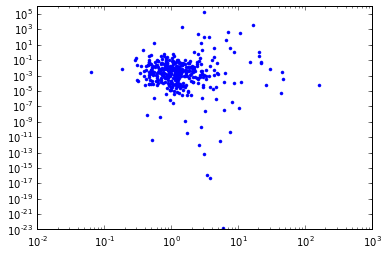

In [74]:
# plt.plot(info.q, info.q_exp, 'b.')
n = 1
plt.plot(info.s[(info.n_deviations == n)], info.q_exp[ (info.n_deviations == n)], 'b.')
# plt.plot(info.s[(info.n_deviations == n)],info.q[ (info.n_deviations == n)], 'g.')
# plt.plot(info.s[(info.q_exp > 1) & (info.n_deviations == n)],1./info.s[(info.q_exp > 1) & (info.n_deviations == n)], 'g-')




plt.xscale('log')
plt.yscale('log')
# plt.ylim(0.1,1)
# plt.xlim(0.1,1)

In [75]:
# deviation1 = []
# deviation2 = []

# for i in tqdm(range(len(info2.name))):
# #     print info.name[i], info.n_deviations[i]
    
#     A_residual = np.asarray(result_n['A'][result_n['name']== info2['name'][i]]) -\
#                  np.asarray(PSPL(result_n['params_PSPL'][result_n['name']== info['name'][i]][0],\
#                       result_n['params_PSPL'][result_n['name']== info2['name'][i]][1],\
#                       result_n['params_PSPL'][result_n['name']== info2['name'][i]][2],\
#                       result_n['params_PSPL'][result_n['name']== info2['name'][i]][3], t))
                                                                                                  
# #     print len(peaks)
    
#     if info.n_deviations[i] == 1:
        
#         deviation1.append(A_residual[result_n['t'][result_n['name']== info['name'][i]] == info['first_peak'][i]])
#         deviation2.append(0)

    
#     else:
        
#         deviation1.append(A_residual[result_n['t'][result_n['name']== info['name'][i]] == info['first_peak'][i]])
#         deviation2.append(A_residual[result_n['t'][result_n['name']== info['name'][i]] == info['second_peak'][i]])

# info['deviation1_height'] = deviation1
# info['deviation2_height'] = deviation2

In [76]:
len(info)

677

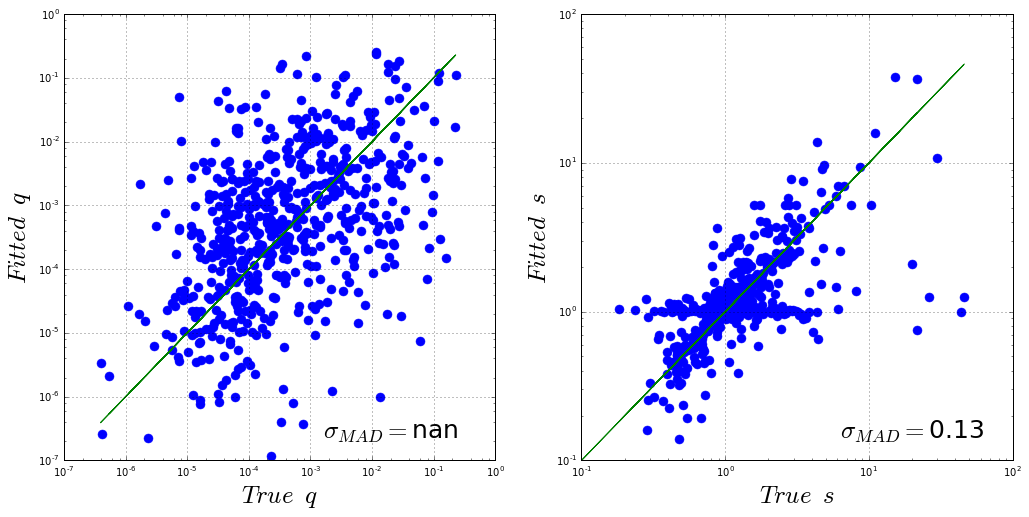

In [71]:
# plt.plot(c_x*(info[x]).astype(float).abs(),c_y*(info[y]).astype(float).abs(), '.',markersize=18, color='b')
x0 = 'q'
y0 = 'q_exp'
x1 = 's'
y1 = 's_exp'

c_y0 = 0.3
c_x0 = 1.0

c_y1 = 1.0
c_x1 = 1.0

fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharey=False)




axs[0].plot(c_x0*(info[x0][info.q_exp<1]).astype(float),
         c_y0*(info[y0][info.q_exp<1]).astype(float).abs(), 
         '.',markersize=18, color='b')
axs[0].plot(c_x0*(info[x0][info.q_exp<1]).astype(float),
         c_x0*(info[x0][info.q_exp<1]).astype(float).abs(), 
         '-',markersize=18, color='g')

axs[1].plot(c_x1*(info[x1][info.q_exp<1]).astype(float),
         c_y1*(info[y1][info.q_exp<1]).astype(float).abs(), 
         '.',markersize=18, color='b')

axs[1].plot(c_x1*(info[x1]).astype(float),
         c_x1*(info[x1]).astype(float).abs(), 
         '-',markersize=18, color='g')

axs[0].set_xlabel('$True \;\; q$', size=25)
axs[0].set_ylabel('$Fitted \;\; q$', size=25)
axs[1].set_xlabel('$True \;\; s$', size=25)
axs[1].set_ylabel('$Fitted \;\; s$', size=25)

axs[0].set_xlim(1e-7, 1)
axs[0].set_ylim(1e-7, 1)

axs[0].grid()
axs[1].grid()


axs[1].set_xlim(0.1, 100)
axs[1].set_ylim(0.1, 100)

axs[0].text(0.6,0.05,'${\sigma}_{MAD}=$'+str(round(1.48*med_med(np.log10(np.abs(info.q_exp.values)), np.log10(np.abs(0.3*info.q.values))),3)),transform=axs[0].transAxes, size = 25)
axs[1].text(0.6,0.05,'${\sigma}_{MAD}=$'+str(round(1.48*med_med(np.log10(info.s_exp.values),\
                                            np.log10(info.s.values)),2)),transform=axs[1].transAxes,  size = 25)



axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')

fig = plt.gcf()
fig.set_size_inches(17.0,8.0)
# fig.savefig('s_q_plot.png')

In [58]:
round(med_med(np.log10(np.abs(info.dropna()['q_exp'][info.dropna()['q_exp']>1e-7])), np.log10(np.abs(info.dropna()['q'][info.dropna()['q_exp']>1e-7]))),3)

0.77

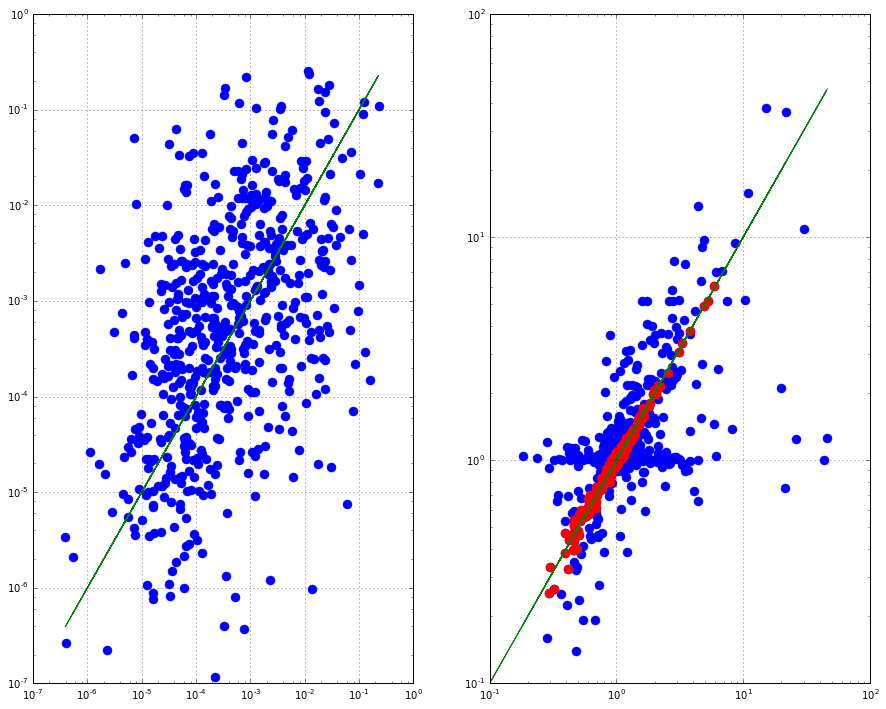

In [304]:
# plt.plot(c_x*(info[x]).astype(float).abs(),c_y*(info[y]).astype(float).abs(), '.',markersize=18, color='b')
x0 = 'q'
y0 = 'q_exp'
x1 = 's'
y1 = 's_exp'

c_y0 = 0.3
c_x0 = 1.0

c_y1 = 1.0
c_x1 = 1.0

fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharey=False)




axs[0].plot(c_x0*(info_panel2[x0][info_panel2.q_exp<1]).astype(float),
         c_y0*(info_panel2[y0][info_panel2.q_exp<1]).astype(float).abs(), 
         '.',markersize=18, color='b')

axs[0].plot(c_x0*(info_panel2[x0][info_panel2.q_exp<1]).astype(float),
         c_x0*(info_panel2[x0][info_panel2.q_exp<1]).astype(float).abs(), 
         '-',markersize=18, color='g')

axs[1].plot(c_x1*(info_panel2[x1][info_panel2.q_exp<1]).astype(float),
         c_y1*(info_panel2[y1][info_panel2.q_exp<1]).astype(float).abs(), 
         '.',markersize=18, color='b')
axs[1].plot(c_x1*(info_panel2[x1][(info_panel2.q_exp<1) & (info_panel2.s_exp < info_panel2.s +0.1)& (info_panel2.s_exp > info_panel2.s -0.1)]).astype(float),
         c_y1*(info_panel2[y1][(info_panel2.q_exp<1) & (info_panel2.s_exp < info_panel2.s +0.1)& (info_panel2.s_exp > info_panel2.s -0.1)]).astype(float).abs(), 
         '.',markersize=18, color='r')
axs[1].plot(c_x1*(info_panel2[x1]).astype(float),
         c_x1*(info_panel2[x1]).astype(float).abs(), 
         '-',markersize=18, color='g')

axs[0].set_xlim(1e-7, 1)
axs[0].set_ylim(1e-7, 1)

axs[0].grid()
axs[1].grid()


axs[1].set_xlim(0.1, 100)
axs[1].set_ylim(0.1, 100)



axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')

In [292]:
# info_panel2 = info_panel2[info_panel2['q_exp'].notna()]

In [313]:
info_panel2[['name','u0','s','s_exp', 'q', 'q_exp', 'n_deviations']][info_panel2.name == 'mag.omcassan_2_73_833.det.lc.W149']

,name,u0,s,s_exp,q,q_exp,n_deviations
226,mag.omcassan_2_73_833.det.lc.W149,-0.065444,0.963769,1.15106,0.000723,0.047869,2.0


In [317]:
info_panel2[['name','u0','s','s_exp', 'q', 'q_exp', 'n_deviations']][(info_panel2.q_exp<1) & (info_panel2.s_exp < info_panel2.s +0.1)& \
                                                (info_panel2.s_exp > info_panel2.s -0.1) & (info_panel2.s >1 )]

,name,u0,s,s_exp,q,q_exp,n_deviations
2,mag.omcassan_0_101_3.det.lc.W149,-0.065059,1.29862,1.303557,0.000047,1.634462e-02,2.0
16,mag.omcassan_0_19_262.det.lc.W149,-0.710252,1.44752,1.452894,0.000016,2.562153e-06,1.0
18,mag.omcassan_0_20_359.det.lc.W149,-1.222180,1.80825,1.751724,0.000096,5.305937e-04,1.0
21,mag.omcassan_0_22_3190.det.lc.W149,0.077862,4.92384,4.909909,0.000194,1.785245e-03,1.0
24,mag.omcassan_0_31_664.det.lc.W149,0.119316,1.07419,1.063260,0.000012,7.481416e-05,2.0
27,mag.omcassan_0_32_977.det.lc.W149,-0.007867,1.10632,1.020142,0.000804,7.292984e-04,2.0
40,mag.omcassan_0_47_2114.det.lc.W149,-0.380915,1.20766,1.254941,0.000163,3.940700e-05,1.0
43,mag.omcassan_0_50_326.det.lc.W149,0.056957,1.51773,1.493167,0.001051,8.867041e-05,2.0
53,mag.omcassan_0_70_1755.det.lc.W149,0.607406,1.83705,1.814000,0.000046,3.555787e-03,1.0
54,mag.omcassan_0_71_672.det.lc.W149,0.014415,1.02526,1.023207,0.000006,8.772992e-05,2.0


In [223]:
# info_panel2 = info_panel2.drop(info_panel2.index[info_panel2.name == 'mag.omcassan_4_61_1035.det.lc.W149' ])

In [249]:
info3[info3.name == 'mag.omcassan_1_96_185.det.lc.W149']

,Unnamed: 0,PSPL_chisqr,PSPL_dh_chisqr,Unnamed: 0.1,Unnamed: 0.1.1,a_PSPL_dh,a_dh,b1_PSPL_dh,b1_dh,b2_PSPL_dh,...,tEp,u0,u0_PSPL,u0_PSPL_dh,w_PSPL_dh,w_dh,xe_PSPL_dh,xe_dh,xp_PSPL_dh,xp_dh
169,33,39944.939898,2.085793e+06,33,179,-0.006754,-0.006213,0.156071,0.171667,0.407727,...,0.405763,0.109391,-0.279901,0.0,1.303122,1.184656,-60.995719,0.167506,0.0,0.0


In [86]:
info['distance_deviations'] = np.abs(info.first_peak - info.second_peak)

In [91]:
info['inverse_s'] = 1./info.s_exp

In [153]:
info[['name', 't0','tE','tE_PSPL_dh','u0','fs_PSPL_dh', 's','s_exp','q', 'q_exp' ]][(info.q_exp<1) &\
                                                                                  (info.s_exp>1.3)& (info.s < 0.8) ].to_csv('colab_V1_s<1_s_exp>1.CSV')

In [315]:
info_panel2[['name', 't0','tE','u0', 's','s_exp', 'q', 'q_exp',  ]][(info_panel2.q_exp<1) &\
                                                                                  (info_panel2.s<0.8) & (info_panel2.s_exp<0.8) ]

,name,t0,tE,u0,s,s_exp,q,q_exp
12,mag.omcassan_0_113_616.det.lc.W149,500.755125,11.37150,0.079386,0.627200,0.652971,0.000117,1.130596e-02
13,mag.omcassan_0_114_1784.det.lc.W149,1777.543504,47.15270,-0.306234,0.710708,0.544047,0.011014,6.344007e-02
19,mag.omcassan_0_22_526.det.lc.W149,311.407644,35.21990,0.958763,0.623442,0.590263,0.000127,3.276207e-03
23,mag.omcassan_0_31_265.det.lc.W149,140.198645,9.56368,-0.591587,0.629363,0.641146,0.000265,1.191576e-04
33,mag.omcassan_0_34_2194.det.lc.W149,1519.139687,95.72930,1.325930,0.481021,0.323215,0.001247,3.431521e-02
37,mag.omcassan_0_44_2070.det.lc.W149,116.150989,12.81780,-0.652054,0.544902,0.415098,0.003193,1.387346e-02
38,mag.omcassan_0_46_741.det.lc.W149,325.798331,11.28730,0.935808,0.591936,0.672743,0.006158,2.790721e-03
47,mag.omcassan_0_59_147.det.lc.W149,1409.974982,12.64870,0.512815,0.594247,0.618038,0.000033,1.749492e-04
52,mag.omcassan_0_7_2860.det.lc.W149,681.273462,126.59100,0.080632,0.341737,0.654542,0.003187,2.339778e-03
59,mag.omcassan_0_73_605.det.lc.W149,1419.788477,6.53610,0.351796,0.612753,0.747498,0.047774,1.035061e-01


In [253]:
info_panel2.s_exp[(info_panel2.q_exp<1) &(info_panel2.s<0.8) & (info_panel2.s_exp>1.3)] = 1./info_panel2.s_exp[(info_panel2.q_exp<1) &(info_panel2.s<0.8) & (info_panel2.s_exp>1.3)]

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
